In [28]:
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.degrees(np.arctan2(y, x))
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(np.radians(phi))
    y = rho * np.sin(np.radians(phi))
    return(x, y)

In [29]:
cmlsel = pd.read_csv('cml-sel.txt', sep='\s+', header=None)
jup_cml = cmlsel[3].to_numpy() # needed

ang_diam = 40.58867
jup_pixel_radius = ang_diam/(0.1)/2

jup_seangle=-3.098 # needed
jup_posangle=0
x = 0

flattening = 0.06487
losflattening = flattening * (1 - np.sin(np.radians(jup_seangle)))
eq_po_ratio = 1 - losflattening

y = jup_pixel_radius*eq_po_ratio

In [17]:
jup_pixel_radius

202.94334999999998

In [3]:
y

189.0669296923842

In [30]:
def nirspec_calc_lat_long(x,y,jup_pixel_radius,jup_seangle,jup_posangle,jup_cml):
    
    jup_posangle2 = (720-jup_posangle) % 360.
    
    latit = np.zeros(5)
    longit = np.zeros(5)
    
    ccc = np.zeros(5)
    ppp = np.zeros(5)
    xxx = np.zeros(5)
    yyy = np.zeros(5)
    xxx = np.zeros(5)
    
    R = jup_pixel_radius
    
    # do a lat and long for each corner of pixel
    for corner in range(5):
        if corner == 0:
            x2 = x + 0.5
            y2 = y + 0.5
        if corner == 1:
            x2 = x + 0.5
            y2 = y - 0.5
        if corner == 2:
            x2 = x - 0.5
            y2 = y - 0.5
        if corner == 3:
            x2 = x - 0.5
            y2 = y + 0.5
        if corner == 4:
            x2 = x
            y2 = y
            
        # rotate the pixels into jovian rotational coordinates
        polar = cart2pol(x2,y2)
        new_polar = jup_posangle2 + polar[1]
        rect2 = pol2cart(polar[0], new_polar)

        xx = rect2[0]

        # stretch yy to become a sphere
        flattening = 0.06487
        losflattening = flattening * (1 - np.sin(np.radians(jup_seangle)))
        eq_po_ratio = 1 - losflattening

        yy = rect2[1] / eq_po_ratio

        pp = np.sqrt(xx**2 + yy**2) # proper distance from centre

        if pp/R < 0.998:
            cc = np.arcsin(pp/R) # angular distance from centre

            ccc[corner] = cc
            ppp[corner] = pp
            xxx[corner] = xx
            yyy[corner] = yy

            latit[corner] = np.arcsin((np.cos(cc) * np.sin(np.radians(jup_seangle))) + ((yy * np.sin(cc) * np.cos(np.radians(jup_seangle))) / pp))
            longit[corner] = np.radians(jup_cml) - np.arctan((xx * np.sin(cc)) / ((pp * np.arccos(np.radians(jup_seangle)) * np.cos(cc)) - (yy * np.sin(np.radians(jup_seangle)) * np.sin(cc))))
            
    """
    zzz = where(longit ne 0.,zzzcount)
    """
    
    return latit, longit

nirspec_calc_lat_long(20,172,jup_pixel_radius,jup_seangle,jup_posangle,jup_cml[20])

(array([1.09647505, 1.08365736, 1.08352038, 1.09633044, 1.08994936]),
 array([3.00722695, 3.01105381, 3.01819185, 3.01457548, 3.01280919]))

In [46]:
jup_pixel_radius = 140
jup_cml = 0
jup_seangle = 0

lat = []
long = []

for j in range(-150,151):
    
    latarr = np.zeros(301)
    longarr = np.zeros(301)
    
    for i in range(-150,151):
        latarr[i+150] = nirspec_calc_lat_long(i,j,jup_pixel_radius,jup_seangle,jup_posangle,jup_cml)[0][4]
        longarr[i+150] = nirspec_calc_lat_long(i,j,jup_pixel_radius,jup_seangle,jup_posangle,jup_cml)[1][4]
    
    lat.append(latarr)
    long.append(longarr)

lat = np.array(lat)
long = np.array(long)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


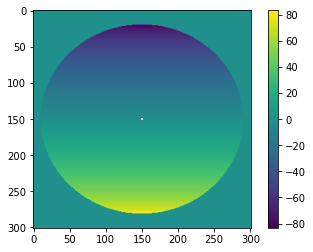

In [50]:
plt.imshow(np.degrees(lat))
plt.colorbar()

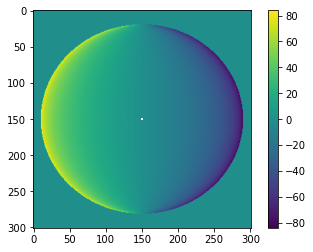

In [48]:
plt.imshow(np.degrees(long))
plt.colorbar()

In [8]:
latt = []
longg = []

for h in range(len(jup_cml)):

    lat = []
    long = []

    for i in range(-150,151):

        latarr = np.zeros(301)
        longarr = np.zeros(301)

        for j in range(0,301):
            latarr[j] = nirspec_calc_lat_long(i,j,jup_pixel_radius,jup_seangle,jup_posangle,jup_cml[h])[0][4]
            longarr[j] = nirspec_calc_lat_long(i,j,jup_pixel_radius,jup_seangle,jup_posangle,jup_cml[h])[1][4]

        lat.append(latarr)
        long.append(longarr)

    lat = np.array(lat)
    long = np.array(long)
    
    latt.append(lat)
    longg.append(long)
    
latt = np.array(latt)
longg = np.array(longg)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


In [8]:
latitude = fits.open('latitude.fits', ignore_missing_end=True)[0].data
longitude = fits.open('longitude.fits', ignore_missing_end=True)[0].data

In [10]:
latitude.shape

(38, 301, 301)

In [12]:
hdu1 = fits.PrimaryHDU(latt)
hdu1.writeto('latitude.fits', overwrite=True)

hdu2 = fits.PrimaryHDU(longg)
hdu2.writeto('longitude.fits', overwrite=True)